In [0]:
import pandas as pd
import keras

from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten,Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

In [85]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
num_classes=10

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
input_shape=x_train[0].shape

In [0]:
# Image Sample

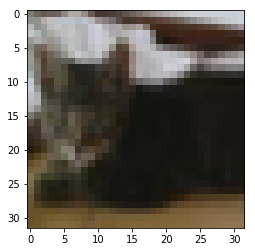

In [91]:
plt.imshow(x_train[9])

In [92]:
x_train[0].shape

(32, 32, 3)

In [0]:
from keras.layers import LeakyReLU

In [0]:
from keras.optimizers import SGD
from keras.layers import BatchNormalization

In [95]:
model = Sequential()


model.add(Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.15))

model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.15))

model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.15))
  
model.add(Flatten())
model.add(Dense(4096,kernel_initializer='he_normal' ,activation='relu'))
model.add(Dropout(0.75))
#model.add(Dense(4096,kernel_initializer='he_normal' ,activation='relu'))
#model.add(Dropout(0.65))

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))
model.summary()

#sgd=SGD(lr=.1, decay=1e-6,momentum=.9,nesterov=True)

model.compile(loss='categorical_crossentropy',   optimizer='adam' ,metrics=['accuracy'])

    



W0802 01:30:34.427363 140672187643776 nn_ops.py:4224] Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
batch_normalization_38 (Batc (None, 16, 16, 64)        256       
__________

In [0]:
epochs=150

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [98]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# check 5 epochs
early_stop = EarlyStopping(monitor='val_acc', patience=15, mode='max') 
callbacks_list = [checkpoint, early_stop]

history = model.fit(x_train, y_train,batch_size=200,epochs=epochs,verbose=1,validation_data=(x_test,y_test),callbacks=callbacks_list)

#history=model.fit_generator(datagen.

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 [==============================] - 12s 244us/step - loss: 2.6293 - acc: 0.3269 - val_loss: 1.6765 - val_acc: 0.3922

Epoch 00001: val_acc improved from -inf to 0.39220, saving model to weights.best.hdf5
Epoch 2/150
50000/50000 [==============================] - 9s 182us/step - loss: 1.3766 - acc: 0.4981 - val_loss: 1.2101 - val_acc: 0.5595

Epoch 00002: val_acc improved from 0.39220 to 0.55950, saving model to weights.best.hdf5
Epoch 3/150
50000/50000 [==============================] - 9s 181us/step - loss: 1.1558 - acc: 0.5840 - val_loss: 1.0119 - val_acc: 0.6446

Epoch 00003: val_acc improved from 0.55950 to 0.64460, saving model to weights.best.hdf5
Epoch 4/150
50000/50000 [==============================] - 9s 181us/step - loss: 1.0107 - acc: 0.6411 - val_loss: 1.0164 - val_acc: 0.6308

Epoch 00004: val_acc did not improve from 0.64460
Epoch 5/150
50000/50000 [==============================] - 9s 181us/step - 

In [99]:

model.load_weights(filepath, by_name=False)
scores = model.evaluate(x_train, y_train, verbose=0)
print("Training %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(x_test, y_test, verbose=0)
print("Test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#histories.append(history)
#    values.append(scores[1]*100)

Training acc: 99.95%
Test acc: 84.34%
